In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib as mpl
import os 


In [ ]:
# Contralateral condition 

data = sio.loadmat('.../ERF_OverTime_Contra_family.mat') # VBA results Contra
bestModelOverTime = data['bestModelOverTime'].squeeze()
time = data['time'].squeeze()
delta = np.load('.../stats_VBA/ERF_means.npz') #deltaF + ts ERF

Contra_la_mean = delta['Contra_la_mean']
Ipsi_la_mean   = delta['Ipsi_la_mean']
Contra_ts_mean = delta['Contra_ts_mean']
Ipsi_ts_mean   = delta['Ipsi_ts_mean']
woi_win =   delta['woi_win']
ts_time =  delta['ts_time']

time_lims=[-300,300]
woi_time=woi_win
t_idx=np.where((woi_time>=time_lims[0]) & (woi_time<=time_lims[1]))[0]
woi_win=woi_time[t_idx]

col_l = plt.cm.cool(np.linspace(0, 1, num=6))
layer_colors = col_l

color_model_1 = layer_colors[0:3].mean(axis=0)
color_model_2 = layer_colors[3]
color_model_3 = layer_colors[4:6].mean(axis=0)

model_colors = {
    1: color_model_1,
    2: color_model_2,
    3: color_model_3
}

mask_woi = (ts_time >= woi_win[0]) & (ts_time <= woi_win[-1])

time_woi = ts_time[mask_woi]
model_woi_c = bestModelOverTime[mask_woi]

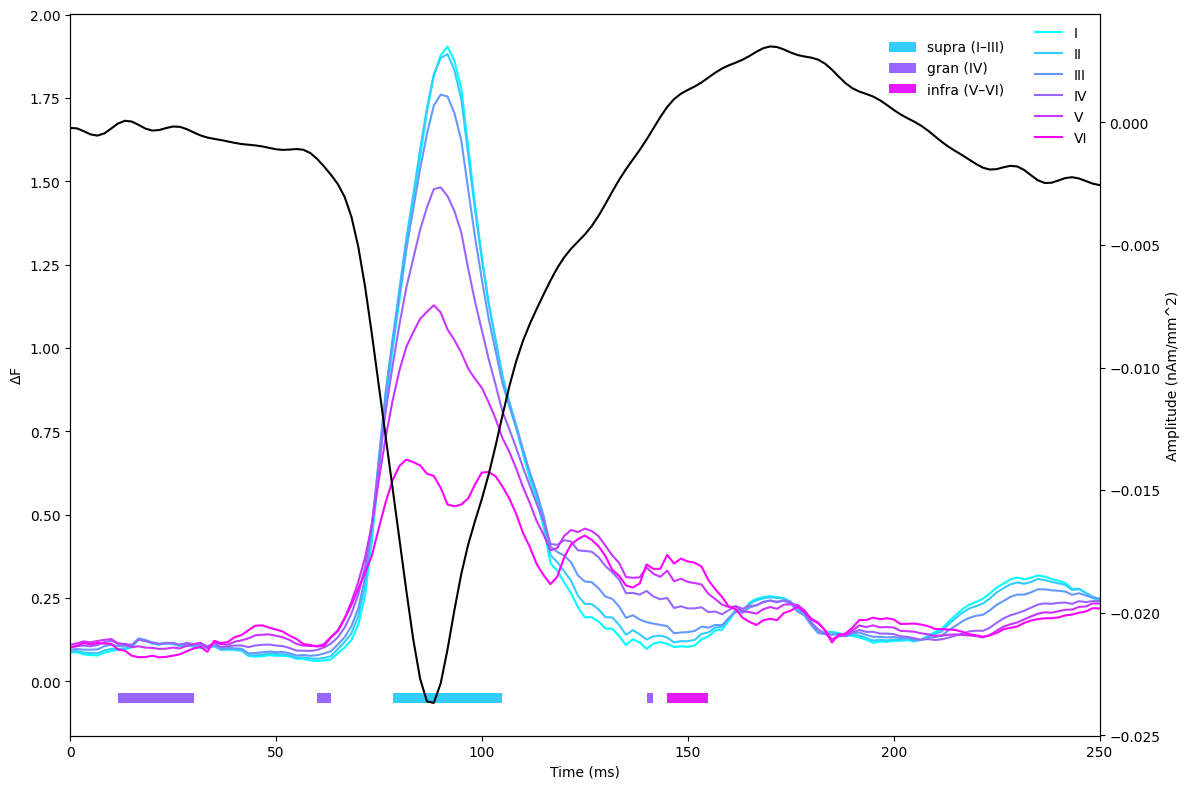

In [4]:

model_woi = model_woi_c

mpl.rcdefaults()

fig, ax = plt.subplots(figsize=(12, 8))

l_labels = ['I', 'II', 'III', 'IV', 'V', 'VI']

for i in range(6):
    ax.plot(
        woi_win,
        Contra_la_mean[i, :],
        label=l_labels[i],
        color=col_l[i]
    )

leg_layers = ax.legend(loc='upper right', frameon=False)
ax.add_artist(leg_layers)

y_model = -0.05
start_idx = 0

for i in range(1, len(model_woi) + 1):
    if i == len(model_woi) or model_woi[i] != model_woi[start_idx]:
        model = model_woi[start_idx]
        if model != 0:
            t_start = time_woi[start_idx]
            t_end = time_woi[i - 1]
            ax.barh(
                y_model,
                width=t_end - t_start + np.median(np.diff(time_woi)),
                left=t_start,
                color=model_colors[model],
                height=0.03
            )
        start_idx = i

model_handles = [
    Patch(facecolor=color_model_1, edgecolor='none', label='supra (I–III)'),
    Patch(facecolor=color_model_2, edgecolor='none', label='gran (IV)'),
    Patch(facecolor=color_model_3, edgecolor='none', label='infra (V–VI)')
]

ax.legend(
    handles=model_handles,
    loc='upper right',
    bbox_to_anchor=(0.92, 0.98),
    frameon=False
)

ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$\Delta$F')

ax2 = ax.twinx()
ax2.set_ylabel('Amplitude (nAm/mm^2)', rotation=90)
ax2.plot(ts_time, Contra_ts_mean, 'k')

ax.set_xlim([0, 250])
plt.tight_layout()

plt.rcParams.update({
    'font.size': 16,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

plt.show()

In [5]:
# Ipsilateral condition 

data = sio.loadmat('/home/membercophy/Matteo_M/V1_ERF/results/stats_VBA/ERF_OverTime_Ipsi_family.mat')
bestModelOverTime = data['bestModelOverTime'].squeeze()
time = data['time'].squeeze()
delta = np.load('/home/membercophy/Matteo_M/V1_ERF/results/stats_VBA/ERF_means.npz')
time_lims=[-300,300]
woi_time=woi_win
t_idx=np.where((woi_time>=time_lims[0]) & (woi_time<=time_lims[1]))[0]
woi_win=woi_time[t_idx]

col_l = plt.cm.cool(np.linspace(0, 1, num=6))
layer_colors = col_l

color_model_1 = layer_colors[0:3].mean(axis=0)
color_model_2 = layer_colors[3]
color_model_3 = layer_colors[4:6].mean(axis=0)

model_colors = {
    1: color_model_1,
    2: color_model_2,
    3: color_model_3
}

mask_woi = (ts_time >= woi_win[0]) & (ts_time <= woi_win[-1])

time_woi = ts_time[mask_woi]
model_woi_c = bestModelOverTime[mask_woi]

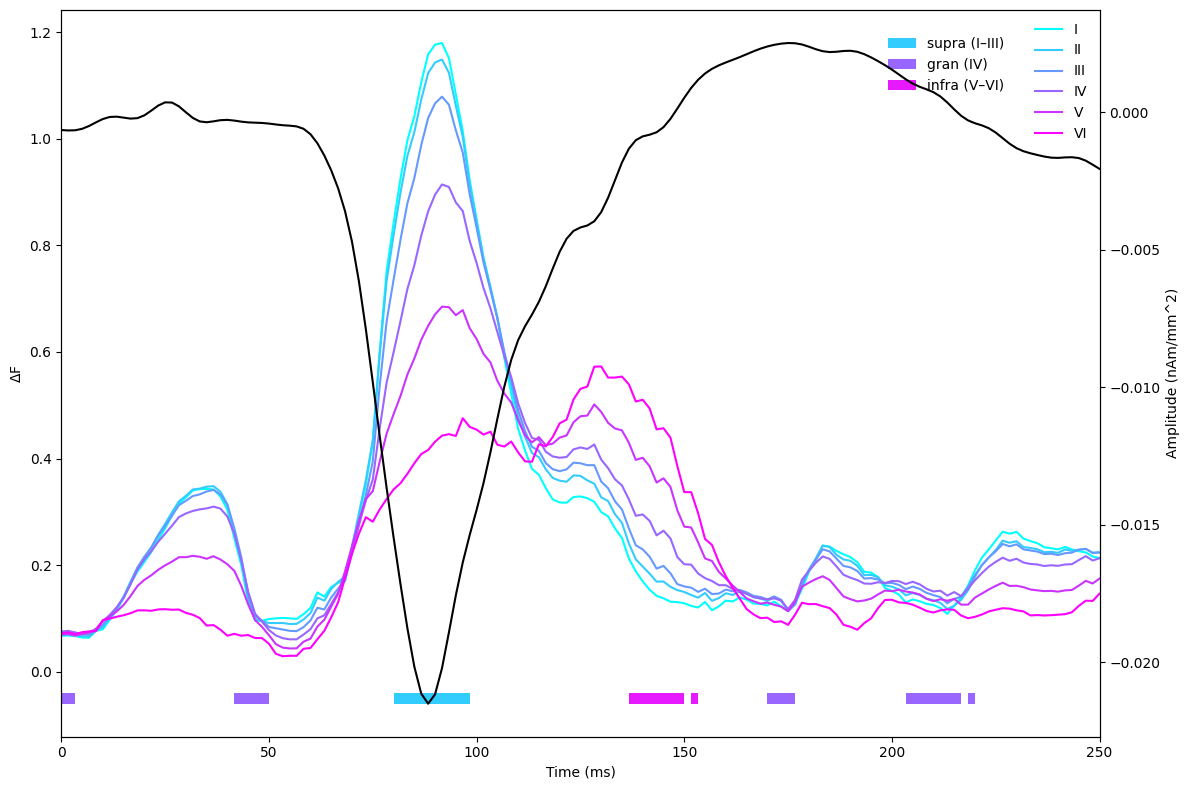

In [6]:
# Ipsi
model_woi = model_woi_c

mpl.rcdefaults()
fig, ax = plt.subplots(figsize=(12, 8))

l_labels = ['I', 'II', 'III', 'IV', 'V', 'VI']

for i in range(6):
    ax.plot(
        woi_win,
        Ipsi_la_mean[i, :],
        label=l_labels[i],
        color=col_l[i]
    )


leg_layers = ax.legend(loc='upper right', frameon=False)
ax.add_artist(leg_layers)

y_model = -0.05
start_idx = 0

for i in range(1, len(model_woi) + 1):
    if i == len(model_woi) or model_woi[i] != model_woi[start_idx]:
        model = model_woi[start_idx]
        if model != 0:
            t_start = time_woi[start_idx]
            t_end = time_woi[i - 1]
            ax.barh(
                y_model,
                width=t_end - t_start + np.median(np.diff(time_woi)),
                left=t_start,
                color=model_colors[model],
                height=0.02
            )
        start_idx = i


model_handles = [
    Patch(facecolor=color_model_1, edgecolor='none', label='supra (I–III)'),
    Patch(facecolor=color_model_2, edgecolor='none', label='gran (IV)'),
    Patch(facecolor=color_model_3, edgecolor='none', label='infra (V–VI)')
]

ax.legend(
    handles=model_handles,
    loc='upper right',
    bbox_to_anchor=(0.92, 0.98),
    frameon=False
)


ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'$\Delta$F')

ax2 = ax.twinx()
ax2.set_ylabel('Amplitude (nAm/mm^2)', rotation=90)
ax2.plot(ts_time, Ipsi_ts_mean, 'k')

ax.set_xlim([0, 250])
plt.tight_layout()

plt.rcParams.update({
    'font.size': 16,
    'xtick.major.size': 6,
    'xtick.major.width': 1.2,
    'ytick.major.size': 6,
    'ytick.major.width': 1.2,
    'legend.frameon': False,
    'legend.handletextpad': 0.1,
    'svg.fonttype': 'none',
    'text.usetex': False
})

plt.show()
